In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

In [2]:
#loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#plotting the first image in the dataset
X_train = X_train.reshape(X_train.shape[0], 28 * 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28 * 28).astype('float32')

In [4]:
#normalizing inputs from 0-255 to 0-1
X_train /= 255
X_test /= 255

In [5]:
#one hot encoding outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [6]:
#defining the model
model = Sequential()

In [7]:
#adding layers to the model
model.add(Dense(512, input_shape=(28 * 28,), activation='relu'))

In [8]:
#reducing the overfitting of values
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [9]:
#compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
#fitting the model
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 12s 24ms/step - loss: 0.2499 - accuracy: 0.9247 - val_loss: 0.0984 - val_accuracy: 0.9690
Epoch 2/10
469/469 [==============================] - 11s 23ms/step - loss: 0.1016 - accuracy: 0.9685 - val_loss: 0.0776 - val_accuracy: 0.9754
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0730 - accuracy: 0.9775 - val_loss: 0.0764 - val_accuracy: 0.9763
Epoch 4/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0545 - accuracy: 0.9827 - val_loss: 0.0722 - val_accuracy: 0.9768
Epoch 5/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0467 - accuracy: 0.9848 - val_loss: 0.0705 - val_accuracy: 0.9786
Epoch 6/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0384 - accuracy: 0.9878 - val_loss: 0.0736 - val_accuracy: 0.9775
Epoch 7/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0340 - accuracy: 0.9885 - val_loss: 0.0655 - val_accuracy:

In [11]:
#evaluating the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.9825999736785889


In [12]:
#predicting the image in the test set
predictions = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


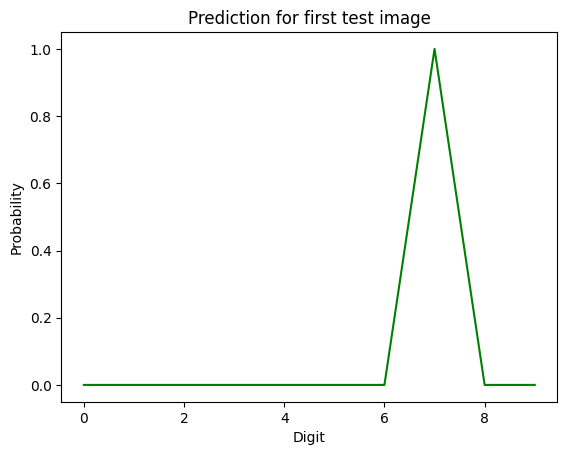

<module 'keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/datasets/mnist.py'>


In [13]:
#plotting the image in the test set
plt.plot(predictions[0], color='green')
plt.title('Prediction for first test image')
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.show()
print(mnist)